Subject: Data Feature Engineering & Machine Learning Code Submission.

Date: January 8, 2025.

Dear Professor Ilia Tetin,

I am writing on behalf of our presentation team, which includes two members:

*   LE TRAN NHA TRAN - JASMINE (Student ID: 11285100M);
*   DINH VAN LONG - BRAD (Student ID: 11285109M).



Below is the machine learning code we implemented, based on the following approach:

- Start with Ridge Regression to achieve a better balance between interpretability and performance. This serves as the baseline model.
- Experiment with k-Nearest Neighbors (kNN) to explore the impact of local patterns in the data.
- Incorporate Random Forest in the pipeline to capture non-linear interactions among features.
- Finally, use SHAP (SHapley Additive exPlanations) to report feature importance and enhance interpretability of the tree-based model.

In [1]:
%%capture
!git clone https://github.com/Brad-1999/Used-phone-group-project
%cd Used-phone-group-project

In [ ]:
%%capture
!pip install -r requirements.txt

1. Data Crawling

In [ ]:
# !scrapy crawl chotot

2. Modeling

In [ ]:
import sys
sys.path.append(".")

# Import the SHAP library for explainability
import shap
# Import custom functions from the `src.trainer` module
from src.trainer import (
    calculate_shap_values,       # Function to calculate SHAP values for model explainability
    create_train_test_splits,    # Function to split data into training and testing sets
    evaluate_model,              # Function to evaluate a trained model on test data
    load_and_preprocess_data,    # Function to load and preprocess the dataset
    report_performance,          # Function to print or summarize model performance metrics
    train_model,                 # Function to train a specified model with given parameters
)

In [ ]:
# Load and preprocess the dataset
X, y = load_and_preprocess_data("data/cleaned_info.csv")

In [ ]:
# Split the dataset into training and testing sets
# X: Feature dataset
# y: Target variable dataset
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=42: Ensures reproducibility of the train-test split by fixing the random seed
X_train, X_test, y_train, y_test = create_train_test_splits(X, y, test_size=0.2, random_state=42)

In [ ]:
# Parameters for Ridge Regression
ridge_params = {
    "alpha": 1.0,  # Regularization strength; default is 1.0
    "param_grid": {  # Grid of hyperparameters for tuning
        "alpha": [0.1, 1.0, 10.0]  # Test different regularization strengths
    },
}

# Parameters for K-Nearest Neighbors (KNN)
knn_params = {
    "n_neighbors": 5,  # Number of neighbors for the default model; default is 5
    "param_grid": {  # Grid of hyperparameters for tuning
        "n_neighbors": [3, 5, 7],  # Test different numbers of neighbors
        "weights": ["uniform", "distance"],  # Test uniform vs. distance-based weighting
    },
}

# Parameters for Random Forest
rf_params = {
    "n_estimators": 50,  # Default number of trees; default is 50
    "param_grid": {  # Grid of hyperparameters for tuning
        "n_estimators": [25, 50, 100],  # Test different numbers of trees
        "max_depth": [None, 5, 10],  # Test different maximum tree depths
        "min_samples_split": [2, 5],  # Test minimum samples required to split a node
    },
}

In [ ]:
# Train Ridge Regression model
ridge_model = train_model(X_train, y_train, "ridge", ridge_params)
# Train K-Nearest Neighbors (KNN) model
knn_model = train_model(X_train, y_train, "knn", knn_params)
# Train Random Forest model
rf_model = train_model(X_train, y_train, "random_forest", rf_params)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.27239e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# Evaluate Ridge Regression model
# ridge_model: Trained Ridge Regression model
# X_test: Test dataset (features) used for evaluation
# y_test: Test dataset (target variable) used for evaluation
# evaluate_model: Function that computes performance metrics (e.g., MAE, RMSE, R2, etc.)
ridge_metrics = evaluate_model(ridge_model, X_test, y_test)

# Evaluate K-Nearest Neighbors (KNN) model
# knn_model: Trained KNN model
# X_test: Test dataset (features)
# y_test: Test dataset (target variable)
knn_metrics = evaluate_model(knn_model, X_test, y_test)

# Evaluate Random Forest model
# rf_model: Trained Random Forest model
# X_test: Test dataset (features)
# y_test: Test dataset (target variable)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

In [ ]:
print("Ridge result:")
report_performance(ridge_metrics)
print("KNN result:")
report_performance(knn_metrics)
print("Random Forest result:")
report_performance(rf_metrics)

Ridge result:
===== Model Performance =====
  MAE:  0.2356
  RMSE: 0.4834
  R2:   0.7922
  MAPE: 154.16%
  RAC @ 80USD: 81.56%

KNN result:
===== Model Performance =====
  MAE:  0.7468
  RMSE: 1.0180
  R2:   0.0784
  MAPE: 239.59%
  RAC @ 80USD: 42.97%

Random Forest result:
===== Model Performance =====
  MAE:  0.2495
  RMSE: 0.5035
  R2:   0.7746
  MAPE: 164.96%
  RAC @ 80USD: 84.09%



1. Ridge Regression:
- Strengths:

  - Achieves the best overall performance in terms of R² = 0.7922, indicating that it explains approximately 79.2% of the variance in the target variable.
  - Produces the lowest MAE (0.2356) and RMSE (0.4834), suggesting high predictive accuracy.
  - RAC @ 80USD = 81.56%, showing that Ridge is reliable in predicting cases above the threshold.
- Weakness:
  - A high MAPE (154.16%) implies that percentage errors are relatively large, especially for small true values.
  - The ill-conditioned matrix warning suggests multicollinearity or poorly scaled data, which could impact model stability.
2. K-Nearest Neighbors (KNN):
- Strengths: Simple and interpretable algorithm.
- Weaknesses:
  - Performs poorly with R² = 0.0784, indicating that it explains only 7.8% of the variance.
  - High MAE (0.7468) and RMSE (1.0180) show that predictions are far from actual values.
  - MAPE (239.59%) and RAC @ 80USD (42.97%) are the worst among the models, indicating that KNN struggles to generalize well, likely due to feature scaling issues or the curse of dimensionality.
3. Random Forest:
- Strengths:
  - Competitive performance with R² = 0.7746, close to Ridge Regression.
  - Moderate MAE (0.2495) and RMSE (0.5035), indicating good prediction accuracy.
  - Best RAC @ 80USD = 84.09%, making it the most reliable model for high-value predictions.
- Weaknesses:
  - High MAPE (164.96%) suggests it struggles with percentage-based error metrics, likely due to outliers or imbalanced data.

Thus, in this case, with prediction accuracy is more important, we believe:
- Random Forest is slightly better for high-value predictions due to its higher RAC @ 80USD (84.09%).
- Random Forest also handles non-linear relationships and outliers more effectively.

 93%|=================== | 93/100 [00:14<00:01]       

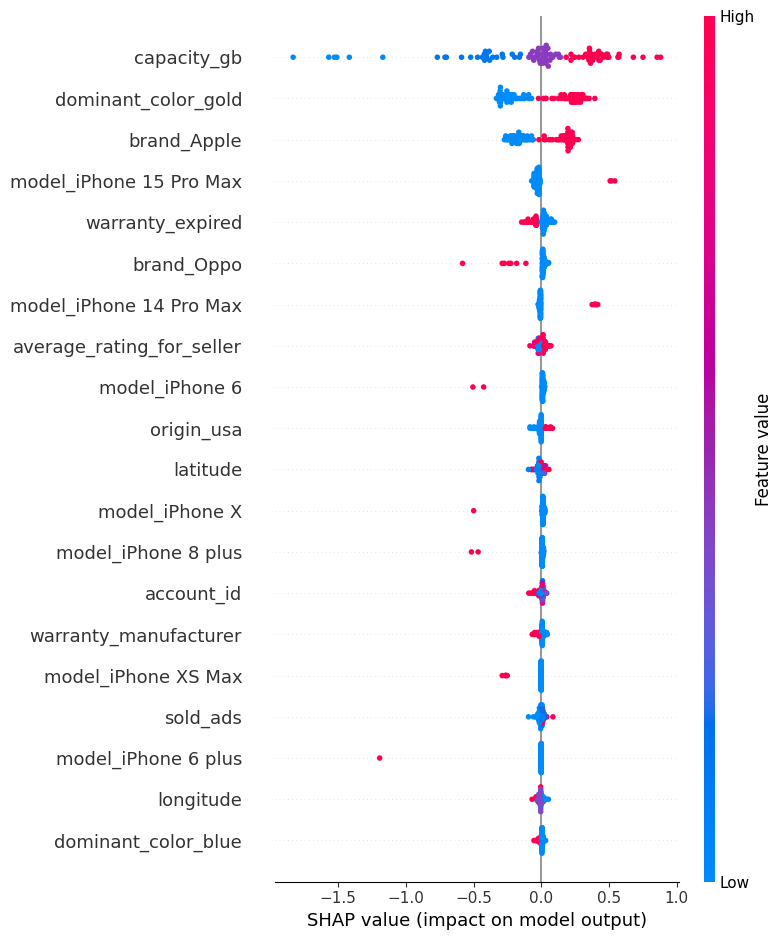

In [ ]:
# Import SHAP library for explainability
import shap

# Calculate SHAP values for the Random Forest model
# rf_model: Trained Random Forest model
# X_test: Test dataset used for evaluation
# X_train: Training dataset for creating the SHAP explainer
# Use a sample of 100 rows from X_test for SHAP computation to reduce computational overhead
rf_shap_values, X_test_sample = calculate_shap_values(rf_model, X_test, X_train, sample_size=100)

# Generate a summary plot for SHAP values with importance of features
# Each dot represents a SHAP value for a specific feature and data point
# Feature importance is ranked from top to bottom, with the most influential feature at the top
shap.summary_plot(rf_shap_values, X_test_sample)

*The chart shows the impact of various features on the prediction target (pricing).*

1. Top Features:
- capacity_gb:

Storage capacity is the most important feature, which aligns with consumer preferences for higher storage in premium phones. The strong impact indicates that storage upgrades directly influence price or demand.
- dominant_color_gold:

Gold-colored phones are associated with luxury and exclusivity, which makes them highly valued in the market. This feature highlights the significance of color in consumer perception and pricing.
- brand_Apple:

Apple dominates as a key driver of price or demand, reflecting its premium positioning and high brand equity in the market.
2. Specific Models:
- model_iPhone 15 Pro Max and model_iPhone 14 Pro Max have a significant impact on predictions.
These models likely represent the highest price tiers or strongest demand.
model_iPhone 6:

- The inclusion of older iPhone models shows residual demand or resale value in the second-hand market.
3. Warranty Status:
warranty_expired:

- Expired warranties negatively influence price or demand, indicating that consumers place a premium on warranty coverage.
- warranty_manufacturer:

Phones with a manufacturer's warranty positively impact predictions, reinforcing the importance of trust and assurance for buyers.
4. Seller and Region Factors:
- average_rating_for_seller:
Seller ratings significantly influence consumer trust and willingness to pay higher prices.
- latitude and longitude:
Geographic location impacts pricing, likely reflecting regional disparities in demand or availability.
5. Other Contributing Features:
- sold_ads:
The number of sold ads is moderately influential, indicating that experienced or high-volume sellers can command better prices.
- origin_usa:
Phones originating from the USA may have higher perceived value, especially for premium brands like Apple.